 matplotlib中的金融图
1、主要画股票中的k线图,好像不可以获取金融数据了，没有mpf.quotes_historical_yahoo_ochl

2、candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)  #正收益为红色，负收益为绿色
**quotes中包含5个数据（时间，开盘，收盘，最低，最高））**
candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g', alpha=0.75)

3、k线图主要是处理好时间刻度的问题:

tushare返回的是时间是DataFrame类型的，需要进行格式上的转换，web.DataReader可以返回datetime.datetime类的时间

In [ ]:
# pip install mpl_finance

In [32]:
import mpl_finance as mpf
import matplotlib
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num 
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# tushare获得数据
得到的数据quotes的日期是倒序排列的，利用 **iterrows()** 进行日期修改时，得到的x轴是倒序的日期，需要修改

利用**zip（）**进行数据修改时，不需要从新排序，因为得到的x轴是0,1,2，……，不需要修改

两种方式处理后得到的图形正好相反，解决措施是，在利用tushare获得数据前先进行一个排列


In [38]:
#以华夏银行为例--600015.SH
import tushare as ts
pro=ts.pro_api('5f2dc9d17ebed3601a4fbea74148a25067d067138bf88515693e9b7d')
quotes=pro.daily(ts_code='600015.SH', start_date='20180101', end_date='20190101',fields=('trade_date','open','close','high','low'))
quotes['trade_date']=pd.to_datetime(quotes['trade_date'])
quotes.set_index('trade_date',inplace=True)     #将日期变成列索引，有利于后期x轴刻度的调整
quotes.sort_index(ascending=True,inplace=True)     #正序排序
quotes.head()

,open,high,low,close
trade_date,,,,
2018-01-02,9.02,9.13,9.01,9.11
2018-01-03,9.10,9.16,9.07,9.13
2018-01-04,9.13,9.17,9.11,9.15
2018-01-05,9.15,9.17,9.13,9.16
2018-01-08,9.15,9.22,9.12,9.19


## candlestick2_ohlc作图
包含四个数据：open，close、high、low 顺序不可变

### 基本图形

<Figure size 1440x576 with 0 Axes>

(<matplotlib.collections.LineCollection at 0x1d54d978>,
 <matplotlib.collections.PolyCollection at 0x1d549e48>)

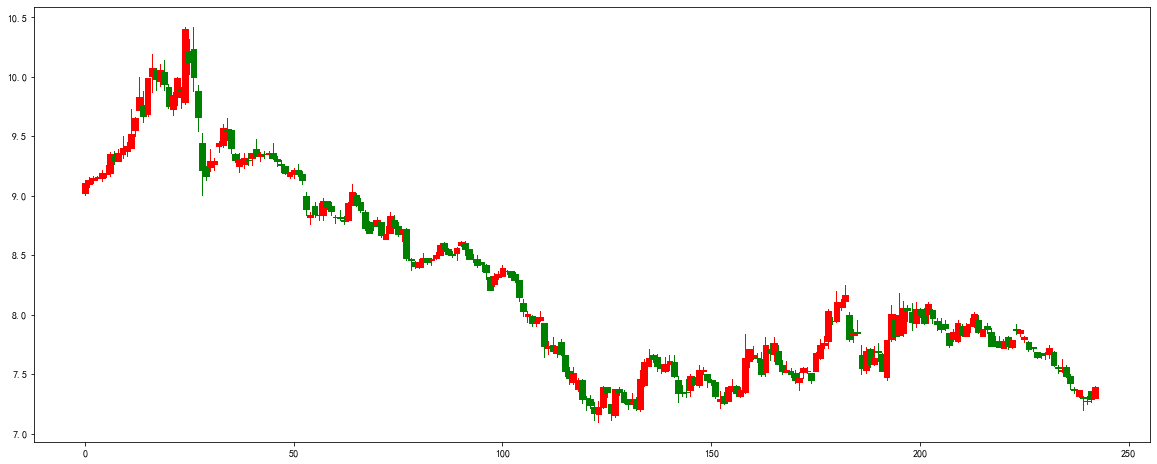

In [41]:
plt.figure(figsize=(20,8),facecolor="white")
ax=plt.subplot(1,1,1)
mpf.candlestick2_ohlc(ax, opens=quotes['open'], closes=quotes['close'], highs=quotes['high'], lows=quotes['low'], width=1.4, colorup='r', colordown='g', alpha=1)

### 修改x轴刻度--基本方法

**适用于x轴刻度为0,1,2，……的如：zip生成日期的candlestick_ohlc和candlestick2_ohlc**

因为传入的数据中没有时间，所以需要手动修改x轴刻度，将其变为日期
最初x轴的刻度是0,1,2,3，……，
若不想展示每一天的可以取步长：

第一步：对原始刻度取步长--ax1.set_xticks(range(0, len(results.index), 15)) 

第二步：根据步长，替换成对应的日期--- 
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 

In [45]:
quotes.index  #---以它的结果作为刻度时，显示的是  2018-01-02 00:00:00

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='trade_date', length=243, freq=None)

In [46]:
quotes.index.strftime('%Y-%m-%d')  
#根据strftime（）中的内容将datetime64[ns]  转化成相应的形式，
# %Y-%m-%d 图上显示结果是2018-01-02
# %Y-%m-%d-%H 图上显示结果是2018-01-02-00

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28'],
      dtype='object', length=243)

<Figure size 1440x576 with 0 Axes>

(<matplotlib.collections.LineCollection at 0x1cfcd898>,
 <matplotlib.collections.PolyCollection at 0x1cff4c18>)

No handles with labels found to put in legend.


(0, 243)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

Text(0.5, 1.0, '股票代码：600015.SH 2018-2019年K线图')

Text(0.5, 0, '时间')

Text(0, 0.5, '股价（元）')

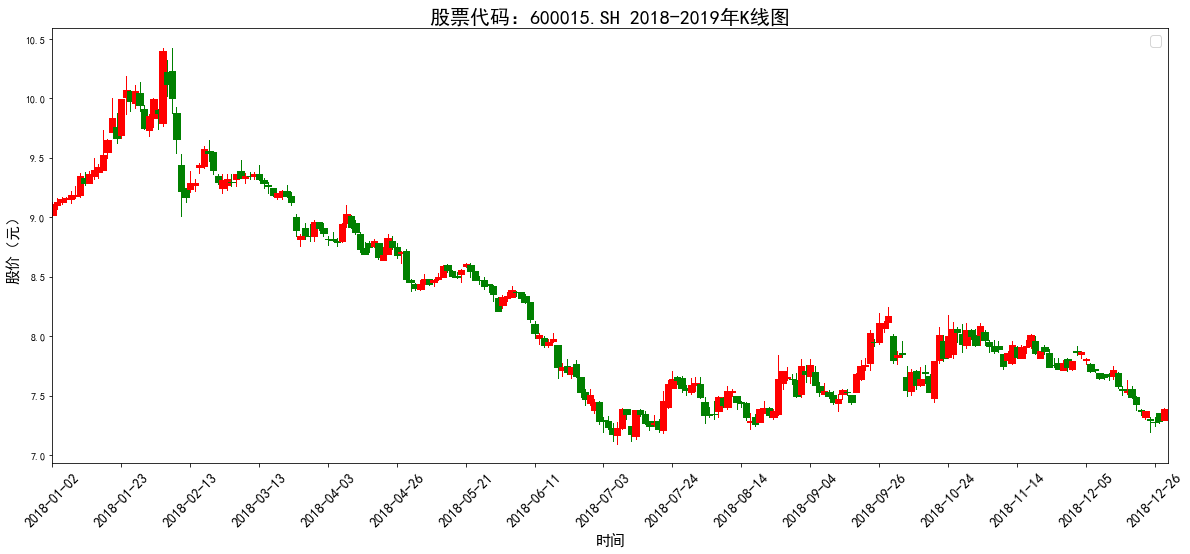

In [48]:
plt.figure(figsize=(20,8),facecolor="white")
ax=plt.subplot(1,1,1)

mpf.candlestick2_ohlc(ax, opens=quotes['open'], closes=quotes['close'], highs=quotes['high'], lows=quotes['low'], width=1.4, colorup='r', colordown='g', alpha=1)

plt.legend(fontsize=14)
ax.set_xlim(0, len(quotes.index))  # 设置一下x轴的范围
# X轴刻度设定 每15天标一个日期----取步长
ax.set_xticks(range(0, len(quotes.index), 15))  
# 标签设置为日期,每隔15天取一个
new_xticks=[quotes.index.strftime('%Y-%m-%d')[index] for index in ax.get_xticks()] 
#new_xticks=[quotes.index[i] for i in ax1.get_xticks()]  显示的日期是2018-01-02-00-00-00
ax.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600015.SH 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

## candlestick_ohlc画图
传入的数据包括：time，open、high、low、close，顺序不可变

直接传入数据是无法运行的，mpf.candlestick_ohlc(ax=ax,quotes=quotes,width=0.2,colorup='g',colordown='r',alpha=1.0)

需要进行修改和调整，转变成candlestick_ohlc可识别的类型 candlestick_ohlc可接受列表参数和单个参数--date2num 

注意date2num()参数格式为datetime.datetime类；只要是DataFrema数据，都不能直接在candlestick_ohlc方法中使用，需要遍历转换为整形数据 步骤如下：

In [50]:
quotes.head(1)

,open,high,low,close
trade_date,,,,
2018-01-02,9.02,9.13,9.01,9.11


### 结合df.iterrows()修改
说明一：**quotes中包含5个数据（时间，开盘，收盘，最高，最低））**
数据传入的顺序必须是（**t,open,high,low,close**）

iterrows（）传入的t为日期，需要经过转化：

datetime.datetime.strptime--转化成date2num可识别的数据

t = date2num(date_time)--转化成candlestick_ohlc可以识别的数据


strptime（待转换的内容--**要求为字符串类型**，待匹配的格式）

#### 基本图形

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x2045e048>,
  <matplotlib.patches.Rectangle at 0x209f4c88>])

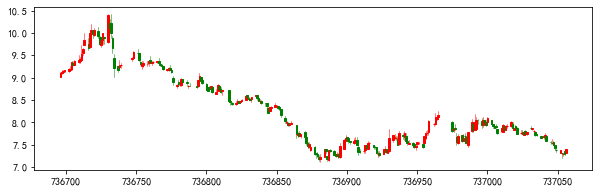

In [52]:
from matplotlib.pylab import date2num
data_list = []

#t参数的修改
for dates,row in quotes.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    open,high,low,close= row[:4]  #将quotes中的相应数据提取出来
    datas = (t,open,high,low,close)  # 传入相关信息： t,open,high,low,close(顺序不可变)
    data_list.append(datas) 
# 创建子图
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)
#datas包含5个数据，而且第一个数据日期经过处理后的
mpf.candlestick_ohlc(ax=ax,quotes=data_list,width=1.2,colorup='r',colordown='g',alpha=1.0)


#### 修改x轴刻度--ax.xaxis_date()

说明二：iterrows()传入的数据t是经过处理后的日期，可以直接通过**ax.xaxis_date()**的方法进行x轴刻度的替换

日期间隔为两个月

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x209245f8>,
  <matplotlib.patches.Rectangle at 0x20f91d68>])

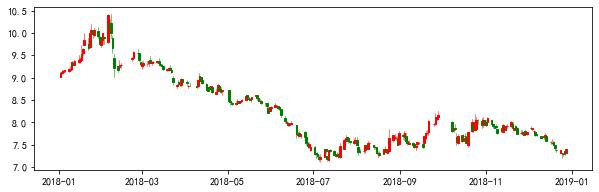

In [53]:
from matplotlib.pylab import date2num
data_list = []

#t参数的修改
for dates,row in quotes.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    open,high,low,close= row[:4]  #将quotes中的相应数据提取出来
    datas = (t,open,high,low,close)  # 传入相关信息： t,open,high,low,close(顺序不可变)
    data_list.append(datas) 
# 创建子图
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)
#datas包含5个数据，而且第一个数据日期经过处理后的
mpf.candlestick_ohlc(ax=ax,quotes=data_list,width=1.2,colorup='r',colordown='g',alpha=1.0)
ax.xaxis_date()

### 法二--zip（方法）
五个数据（index,open,colse,high,low），zip方法不需要进行日期的处理，index=0,1,2，……

#### 基本图形

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x2107b320>,
  <matplotlib.patches.Rectangle at 0x2152c9e8>])

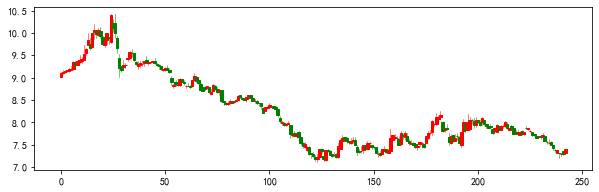

In [54]:
import numpy as np
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)
#t,open,high,low,close
ohlc1 = zip(np.arange(0,len(quotes.index)),quotes.open,quotes.high,quotes.low,quotes.close)#使用zip方法生成数据列表 
mpf.candlestick_ohlc(ax, ohlc1, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

#### 修改x轴的刻度--基本方法

<Figure size 720x216 with 0 Axes>

No handles with labels found to put in legend.


(0, 243)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

Text(0.5, 1.0, '股票代码：600015.SH 2018-2019年K线图')

Text(0.5, 0, '时间')

Text(0, 0.5, '股价（元）')

([<matplotlib.lines.Line2D at 0x21eb6b38>,
  <matplotlib.patches.Rectangle at 0x223612b0>])

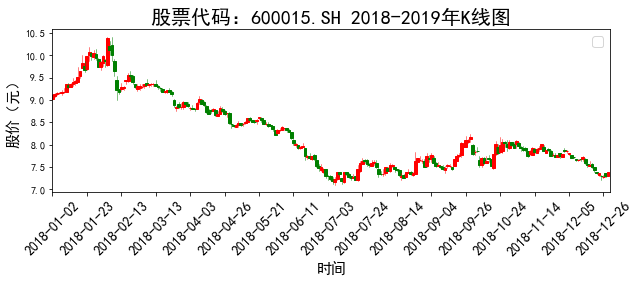

In [56]:
plt.figure(figsize=(10,3),facecolor="white")
ax=plt.subplot(1,1,1)

plt.legend(fontsize=14)
ax.set_xlim(0, len(quotes.index))  
ax.set_xticks(range(0, len(quotes.index), 15))  
new_xticks=[quotes.index.strftime('%Y-%m-%d')[index] for index in ax.get_xticks()] 
ax.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600015.SH 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

ohlc1 = zip(np.arange(0,len(quotes.index)),quotes.open,quotes.high,quotes.low,quotes.close)#使用zip方法生成数据列表 
mpf.candlestick_ohlc(ax, ohlc1, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

## candlestick_ochl
传入参数为：t,open,colse,high,low(顺序不可变)，其它和之前的一样

### 结合df.iterrows()修改

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x23f38160>,
  <matplotlib.patches.Rectangle at 0x243f6c50>])

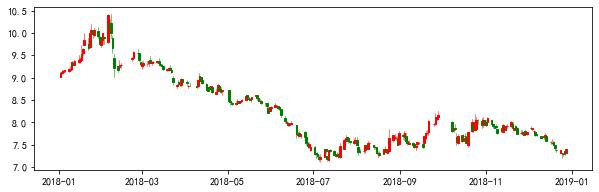

In [59]:
from matplotlib.pylab import date2num
data_list = []

#t参数的修改
for dates,row in quotes.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    open,high,low,close= row[:4]  #将quotes中的相应数据提取出来
    datas = (t,open,close,high,low)  # 传入相关信息： t,open,high,low,close(顺序不可变)
    data_list.append(datas) 
# 创建子图
plt.figure(figsize=(10,3))
ax=plt.subplot(1,1,1)

#datas包含5个数据，而且第一个数据日期经过处理后的
mpf.candlestick_ochl(ax=ax,quotes=data_list,width=1.2,colorup='r',colordown='g',alpha=1.0)

ax.xaxis_date()

### 法二--zip（方法）

<Figure size 720x216 with 0 Axes>

No handles with labels found to put in legend.


(0, 243)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

Text(0.5, 1.0, '股票代码：600015.SH 2018-2019年K线图')

Text(0.5, 0, '时间')

Text(0, 0.5, '股价（元）')

([<matplotlib.lines.Line2D at 0x24a17940>,
  <matplotlib.patches.Rectangle at 0x24f8a828>])

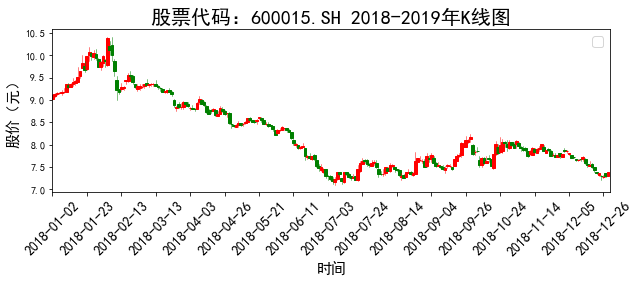

In [62]:
plt.figure(figsize=(10,3),facecolor="white")
ax=plt.subplot(1,1,1)

plt.legend(fontsize=14)
ax.set_xlim(0, len(quotes.index))  
ax.set_xticks(range(0, len(quotes.index), 15))  
new_xticks=[quotes.index.strftime('%Y-%m-%d')[index] for index in ax.get_xticks()] 
ax.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600015.SH 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

ohlc1 = list(zip(np.arange(0,len(quotes.index)),quotes.open,quotes.close,quotes.high,quotes.low))#使用zip方法生成数据列表 
mpf.candlestick_ochl(ax, ohlc1, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

# web.DataReader获取数据
web.DataReader获得的数据是正序的，不需要对数据进行重新排序

In [24]:
#得到的数据日期是正序排列
import pandas_datareader.data as web
results = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.datetime(2019, 1, 1))
results.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,11.93,11.75,11.83,11.87,9507327.0,11.772560
2018-01-03,12.26,11.81,11.81,12.17,16068391.0,12.070098
2018-01-04,12.18,12.01,12.06,12.09,10067364.0,11.990755
2018-01-05,12.38,12.03,12.16,12.04,12695730.0,11.941166
2018-01-08,12.55,11.70,11.96,12.32,21512391.0,12.218866


## candlestick2_ohlc作图

<Figure size 800x240 with 0 Axes>

No handles with labels found to put in legend.


(0, 244)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

Text(0.5, 1.0, '股票代码：600797.SS 2018-2019年K线图')

Text(0.5, 0, '时间')

Text(0, 0.5, '股价（元）')

(<matplotlib.collections.LineCollection at 0x25299048>,
 <matplotlib.collections.PolyCollection at 0x25265828>)

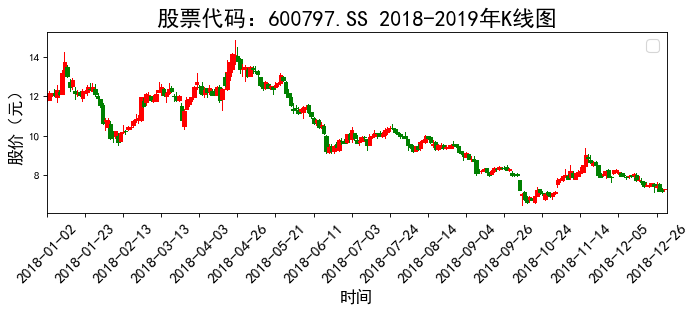

In [66]:
plt.figure(figsize=(10,3),dpi=80)
ax1=plt.subplot(1,1,1)

plt.legend(fontsize=14)
ax1.set_xlim(0, len(results.index))  # 设置一下x轴的范围
# X轴刻度设定 每15天标一个日期----取步长
ax1.set_xticks(range(0, len(results.index), 15))  
# 标签设置为日期,每隔15天取一个
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 
#new_xticks=[results.index[i] for i in ax1.get_xticks()]  显示的日期是2018-01-02-00-00-00
ax1.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600797.SS 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

mpf.candlestick2_ohlc(ax1, opens=results['Open'], closes=results['Close'],highs= results['High'], lows=results['Low'], width=1.4, colorup='r', colordown='g', alpha=1)

## candlestick_ohlc画图


### 结合df.iterrows()修改

<Figure size 800x240 with 0 Axes>

([<matplotlib.lines.Line2D at 0x279a43c8>,
  <matplotlib.patches.Rectangle at 0x27e67e10>])

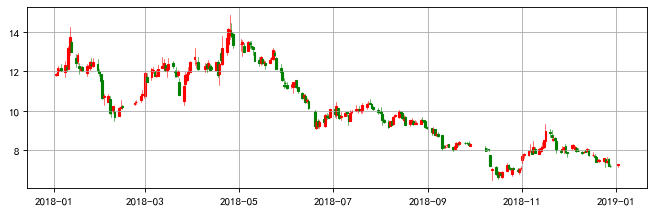

In [70]:
plt.figure(figsize=(10,3),dpi=80)
ax1=plt.subplot(1,1,1)

data_list = []
for dates,row in results.iterrows():
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    high,low,open,close= row[:4]  #将quotes中的相应数据提取出来
    datas = (t,open,high,low,close)  # 传入相关信息： t,open,high,low,close(顺序不可变)
    data_list.append(datas) 
    
mpf.candlestick_ohlc(ax=ax1,quotes=data_list,width=1.2,colorup='r',colordown='g',alpha=1.0)

ax1.xaxis_date()
plt.grid()

###  法二--zip（方法）

<Figure size 720x216 with 0 Axes>

No handles with labels found to put in legend.


(0, 244)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

Text(0.5, 1.0, '股票代码：600797.SS 2018-2019年K线图')

Text(0.5, 0, '时间')

Text(0, 0.5, '股价（元）')

([<matplotlib.lines.Line2D at 0x27ef3be0>,
  <matplotlib.patches.Rectangle at 0x2841de80>])

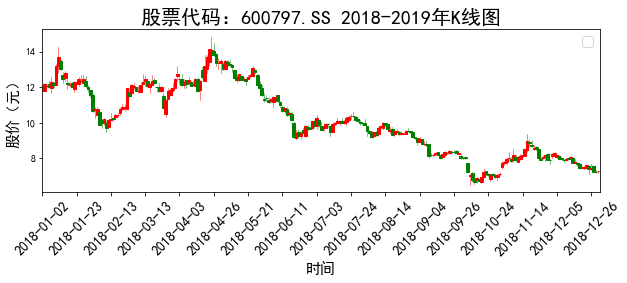

In [71]:
import numpy as np
plt.figure(figsize=(10,3))
ax1=plt.subplot(1,1,1)

ohlc = zip(np.arange(0,len(results.index)),results.Open,results.Close,results.Low,results.High)#使用zip方法生成数据列表 
#ohlc包含五个数据（t,open,colse,high,low）
mpf.candlestick_ochl(ax1, ohlc, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

plt.legend(fontsize=14)
ax1.set_xlim(0, len(results.index))  # 设置一下x轴的范围
# X轴刻度设定 每15天标一个日期----取步长
ax1.set_xticks(range(0, len(results.index), 15))  
# 标签设置为日期,每隔15天取一个
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 
#new_xticks=[results.index[i] for i in ax1.get_xticks()]  显示的日期是2018-01-02-00-00-00
ax1.set_xticklabels(new_xticks,fontsize=14,rotation=45)  
plt.yticks.fontsize=30
plt.title("股票代码：600797.SS 2018-2019年K线图",fontsize=20)
plt.xlabel("时间",fontsize=15)
plt.ylabel("股价（元）",fontsize=15)

## candlestick_ochl

### 结合df.iterrows()修改

<Figure size 800x240 with 0 Axes>

([<matplotlib.lines.Line2D at 0x28505be0>,
  <matplotlib.patches.Rectangle at 0x289b7668>])

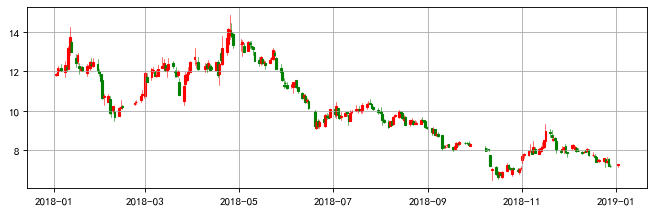

In [72]:
plt.figure(figsize=(10,3),dpi=80)
ax1=plt.subplot(1,1,1)

data_list = []
for dates,row in results.iterrows():
    date_time = datetime.datetime.strptime(str(dates),'%Y-%m-%d %H:%M:%S')
    t = date2num(date_time)
    high,low,open,close= row[:4]  #将quotes中的相应数据提取出来
    datas = (t,open,close,high,low)  # 传入相关信息： t,open,high,low,close(顺序不可变)
    data_list.append(datas) 
    
mpf.candlestick_ochl(ax=ax1,quotes=data_list,width=1.2,colorup='r',colordown='g',alpha=1.0)

ax1.xaxis_date()
plt.grid()

### zip( )常规方法

<Figure size 720x216 with 0 Axes>

([<matplotlib.lines.Line2D at 0x27f31438>,
  <matplotlib.patches.Rectangle at 0x29f21668>])

(0, 244)

[Text(0, 0, '2018-01-02'),
 Text(0, 0, '2018-01-23'),
 Text(0, 0, '2018-02-13'),
 Text(0, 0, '2018-03-13'),
 Text(0, 0, '2018-04-03'),
 Text(0, 0, '2018-04-26'),
 Text(0, 0, '2018-05-21'),
 Text(0, 0, '2018-06-11'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-24'),
 Text(0, 0, '2018-08-14'),
 Text(0, 0, '2018-09-04'),
 Text(0, 0, '2018-09-26'),
 Text(0, 0, '2018-10-24'),
 Text(0, 0, '2018-11-14'),
 Text(0, 0, '2018-12-05'),
 Text(0, 0, '2018-12-26')]

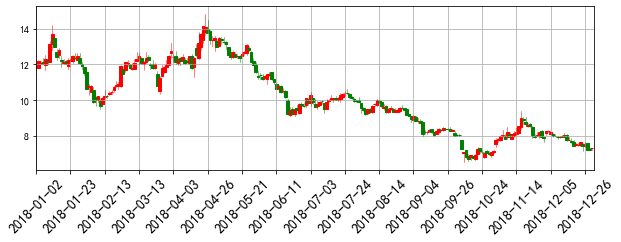

In [73]:
import numpy as np
plt.figure(figsize=(10,3))
ax1=plt.subplot(1,1,1)

ohlc = zip(np.arange(0,len(results.index)),results.Open,results.Close,results.High,results.Low)#使用zip方法生成数据列表 
mpf.candlestick_ochl(ax1, ohlc, width=1.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

ax1.set_xlim(0, len(results.index)) 
ax1.set_xticks(range(0, len(results.index), 15))  
new_xticks=[results.index.strftime('%Y-%m-%d')[index] for index in ax1.get_xticks()] 
ax1.set_xticklabels(new_xticks,fontsize=14,rotation=45) 
plt.grid()